In [84]:
import requests
from pycbrf.toolbox import ExchangeRates
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie


### Получаем 100 ваканский по заданному запросу по номеру страницы
def get_100_vacancies(page):
    payload = {'text': """ "machine learning" 
                OR "data science" OR "машинное обучение" 
                OR "big data" OR "data analytics" 
                OR "искуственный интеллект" OR "нейронные сети" 
                OR "data mining" 
                OR "большие данные" 
                OR "datalogy" OR "наука о данных"  
                OR "deep learning" OR  "глубинное обучение" 
                OR "глубокое обучение" 
                OR "Artificial intelligence" OR "ML" 
                OR "data scientist" """,
               'currency': 'RUR',
               'only_with_salary': True,
               'per_page': 100,
               'page': page
               }
    req = requests.get('https://api.hh.ru/vacancies', params=payload)
    return req.json().get('items', 'ERROR')


### Получаем 1000 или меньше ваканский, подходящих под наш запрос
def get_1000_vacancies():
    vacancies = list()
    for page in range(10):
        vacancies.extend(get_100_vacancies(page))
    return vacancies


### Обрабатываем полученные данные, удаляя ненужные нам поля из тела ответа
def handle_salary(vacancies):
    count = 0
    rates = ExchangeRates()
    for vacancy in vacancies:
        for key in list(vacancy.keys()):
            if key not in ('name', 'salary', 'employer', 'area'):
                vacancy.pop(key)

        #print(count, vacancy)
        count += 1

    count = 0
    for vacancy in vacancies:
        if vacancy['salary']['to'] is not None and vacancy['salary']['from'] is not None:
            tmp = (vacancy['salary']['to'] + vacancy['salary']['from']) / 2
        elif vacancy['salary']['to'] is not None:
            tmp = vacancy['salary']['to']
        else:
            tmp = vacancy['salary']['from']

        currency = vacancy['salary']['currency']
        if currency != 'RUR':
            if currency == 'BYR':
                currency = 'BYN'
            tmp *= float(rates[currency].value)/float(rates[currency].par)

        vacancy['salary'] = tmp
        # print('[', count, vacancy)
        count += 1


### Получаем словарь, в котором ключ - название вакансии, значение - медаианное значение зарплаты по этой вакансии
def get_salary(vacancies, quontities):
    my_dict = {}
    for vacancy in vacancies:
        if my_dict.get(vacancy['name'], None) is None:
            my_dict[vacancy['name']] = vacancy['salary']
        else:
            my_dict[vacancy['name']] += vacancy['salary']

    for key in my_dict.keys():
        my_dict[key] /= quontities[key]
    return my_dict

### Получаем словарь, в котором ключ - название вакансии, значение - количество позиций по данной вакансии
def get_quontities(vacancies):
    my_dict = {}
    for vacancy in vacancies:
        if my_dict.get(vacancy['name'], None) is None:
            my_dict[vacancy['name']] = 1
        else:
            my_dict[vacancy['name']] += 1

    return my_dict


### Получаем словарь, в котором ключ - город, значение - количество ваканский в этом городе
def get_cities(vacancies):
    my_dict = {}
    for vacancy in vacancies:
        if my_dict.get(vacancy['area']['name'], None) is None:
            my_dict[vacancy['area']['name']] = 1
        else:
            my_dict[vacancy['area']['name']] += 1
            
    other = list()
    minimum = 4
    other_key = f'Other(<{minimum})'
    my_dict[other_key] = 0
    
    for key in list(my_dict.keys()):
        if my_dict[key] < minimum:
            my_dict[other_key] += 1
            other.append(key)
            del my_dict[key]
            
    return my_dict, other, other_key

print('Пожалуйста, подождите...')
### Получаем 1000 или меньше ваканский по нашему запросу
vacancies = get_1000_vacancies()
### Обрабатываем их, оставляя лишь поля name, salary, area, employer
handle_salary(vacancies)
### Получае последовательно из словари с информацией о количестве, зарплате и городах вакансий
quontities = get_quontities(vacancies)
salary_dict = get_salary(vacancies, quontities)
cities, other, other_key = get_cities(vacancies)

print('OK!')

Пожалуйста, подождите...
OK!


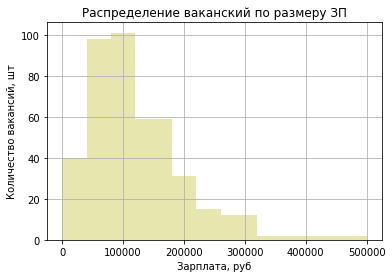

In [85]:
### Строим столбчатую диаграмму по распределению ваканский в зависимости от ЗП
n, bins, patches = plt.hist(salary_dict.values(), range=(0, 500000), color='#e6e6ae', bins=[0, 40_000, 80_000, 120_000, 150_000, 180_000, 220_000, 260_000, 320_000, 380_000, 500_000], histtype='stepfilled')
### Наносим имена осей, название диаграммы и отображаем ее
plt.xlabel('Зарплата, руб')
plt.ylabel('Количество вакансий, шт')
plt.title('Распределение ваканский по размеру ЗП')
plt.grid(True)
plt.show()

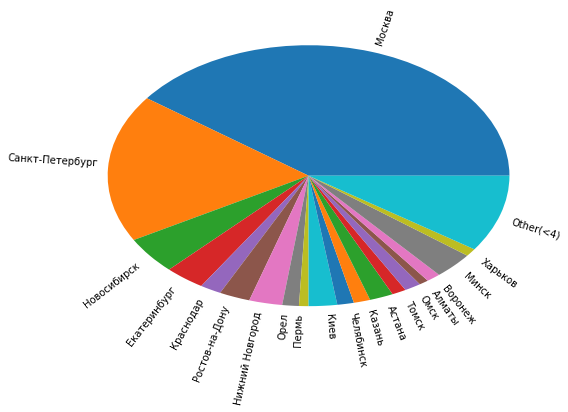

In [86]:
### Строим круговоую диаграмму по распределению ваканский по городам
patches, texts = pie(cities.values(), 
                     None, cities.keys(), 
                     labeldistance=1.05, radius=1.5, 
                     rotatelabels=True)

In [87]:
### Выводим города, попавшие в раздел 'Other' по принципу минимального количества ваканский
print(f'Итого {cities[other_key]} ваканский, {other_key}:')
for city in other:
    print(city)

Итого 50 ваканский, Other(<4):
Ижевск
Таганрог
Рязань
Тула
Тюмень
Одесса
Япония
Тольятти
США
Калининград
Ульяновск
Иркутск
Чебоксары
Ярославль
Кстово
Липецк
Белгород
Великий Новгород
Киров
Наро-Фоминск
Волгоград
Тверь
Тамбов
Архангельск
Мурманск
Псков
Петрозаводск
Майкоп
Саратов
Кировоград
Пенза
Набережные Челны
Красноярск
Китай
Калуга
Череповец
Днепр (Днепропетровск)
Уфа
Благовещенск (Амурская область)
Самара
Донецк (Украина)
Кипр
Смолевичи
Рыбинск
Севастополь
Винница
Ужгород
Львов
Тернополь
Симферополь
